In [1]:
import pandas as pd
import numpy as np


1. How likely is it that you roll doubles when rolling two dice?

In [2]:
# Based on simulations:
n_simulations = nrows = 1000000
n_dice_rolled = ncols = 2

rolls = np.random.choice([1, 2, 3, 4, 5, 6], nrows * ncols).reshape(nrows, ncols)

probability = [x for x in rolls if x[0] == x[1]]
print(f"Chance of doubles: {len(probability)/len(rolls) * 100:.2f} %")

Chance of doubles: 16.66 %


2. If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

In [3]:
n_trials = nrows = 10_000
n_coins = ncols = 8

rolls = np.random.choice([0,1], n_trials * n_coins).reshape(nrows, ncols)
rolls

array([[0, 0, 0, ..., 1, 1, 0],
       [1, 1, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 1, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 1, 1]])

In [4]:
trial_sums = rolls.sum(axis=1)
trial_sums

array([3, 5, 3, ..., 4, 3, 4])

In [5]:
print(f"The probability of getting three heads is: {np.count_nonzero(trial_sums == 3) / len(trial_sums) * 100:.2f} %")

The probability of getting three heads is: 21.28 %


In [6]:
print(f"The probability of getting more than three heads is: {np.count_nonzero(trial_sums > 3) / len(trial_sums) * 100:.2f} %")

The probability of getting more than three heads is: 63.85 %


In [7]:
# How to verify?
count = 0
for item in trial_sums:
    if item == 3:
        count += 1
print(count)

2128


3. There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

In [22]:
# 75% chance web development aka 0.
# 25% chance data science aka 1.
# 6.25% (25% * 25%)
# Now, how to simulate this:

ds = 1
wd = 0
n_trials = nrows = 10_000
n_billboards = ncols = 2

b_rollin = np.random.choice(['ds','wd','wd','wd'], n_trials * n_billboards).reshape(nrows, ncols)
b_rollin

array([['wd', 'wd'],
       ['wd', 'wd'],
       ['wd', 'wd'],
       ...,
       ['wd', 'wd'],
       ['wd', 'wd'],
       ['wd', 'ds']], dtype='<U2')

In [23]:
sums_by_trial = (b_rollin == 'ds').sum(axis=1)
sums_by_trial

array([0, 0, 0, ..., 0, 0, 1])

In [24]:
print(f" The chances of a data science student's head on both billboards are: {np.count_nonzero(sums_by_trial == 2) / len(b_rollin) * 100:.2f} %")

 The chances of a data science student's head on both billboards are: 6.36 %


4. Codeup students buy, on average, 3 poptart packages with a standard deviation of 1.5 a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon? (Remember, if you have mean and standard deviation, use the np.random.normal) You'll need to make a judgement call on how to handle some of your values

There is a 72.31 % chance you will get a poptart on Friday.


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

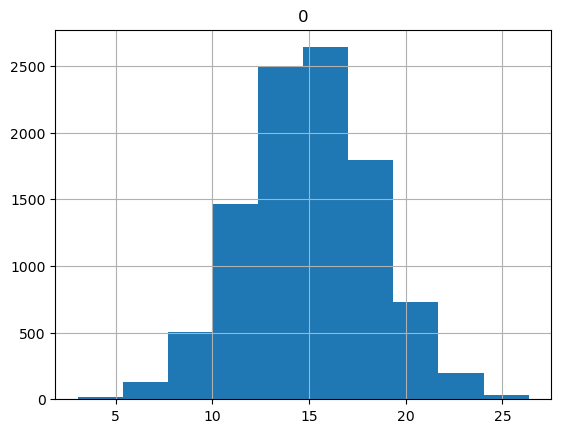

In [28]:
pop_ave = 3
pop_sd = 1.5
init_pops = 17

testing_this = np.random.normal(loc=pop_ave, scale=pop_sd, size=(10000, 5))
testing_this_sum = testing_this.sum(axis=1).round(2)
x = pd.DataFrame(testing_this_sum)
print(f"There is a {(1-np.count_nonzero(testing_this_sum > 17)/ len(testing_this_sum)) * 100:.2f} % chance you will get a poptart on Friday.")
x.hist()

5. Compare Heights

    - Men have an average height of 178 cm and standard deviation of 8cm.
    - Women have a mean of 170, sd = 6cm.
    - Since you have means and standard deviations, you can use np.random.normal to generate observations.
    - If a man and woman are chosen at random, what is the likelihood the woman is taller than the man?

In [12]:
ave_men = 178
sd_men = 8
ave_women = 170
sd_women = 6

men = np.random.normal(loc=ave_men, scale=sd_men, size=(100000,))
women = np.random.normal(loc=ave_women, scale=sd_women, size=(100000,))
height = pd.DataFrame({'men': men, 'women': women})


print(f"The chances of a women being taller than a man are: {len(height[women > men]) / len(height) * 100:.2f} %")

The chances of a women being taller than a man are: 21.33 %


6. When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. What are the odds that after having 50 students download anaconda, no one has an installation issue? 100 students?

    - What is the probability that we observe an installation issue within the first 150 students that download anaconda?



In [39]:
chance_of_failure = 0.004
num_of_trials = 450
trials = np.random.binomial(n=num_of_trials, p=chance_of_failure, size=(1_000_000))


print(f"Chances of no issue via random sample are: {((1-(sum(trials > 0)/len(trials))) * 100):.1f} %")
# 50: 81.8%
#100: 67.0%
#150: 54.7%
#450: 16.5%

Chances of no issue via random sample are: 16.5 %


    - How likely is it that 450 students all download anaconda without an issue?

In [33]:
print(f'The probability of a problem in the first 450 people is: {.996**450 * 100:.2f} %')

The probability of a problem in the first 450 people is: 16.47 %


7. There's a 70% chance on any given day that there will be at least one food truck at Travis Park. However, you haven't seen a food truck there in 3 days. How unlikely is this?

    - How likely is it that a food truck will show up sometime this week?

In [43]:
# Order matters. Binomial. 
food_truck = 0.7
num_of_days = 5

#This sets up a group of 5 columns which contain a 0 (30% chance) or a 1 (70% chance).
trials = np.random.binomial(n=1, p=food_truck, size=(100000, 7)) #Probability can be entered as a list [0.3, 0.7]

#This splices the number of days from the trials array:
matrix= trials[:, :num_of_days]
#This calculates the chance of the truck not showing up based on the number of days entered.
chance_of_no_truck = round((1 - (np.count_nonzero(np.sum(matrix == 0, axis=1)) / len(matrix))) * 100,2)
print(f'The chance of the truck NOT showing up in {num_of_days} days is {chance_of_no_truck} %')
# 3: 34.41%
# 5: 16.72%

The chance of the truck NOT showing up in 5 days is 16.64 %


8. If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?

In [16]:
# This is a Poisson(?)
# 365 is the start but it will count down with each additional birthday.

size = (10000,23)

random_bdays = np.random.uniform(low=0, high=366, size=size).astype(int)
pd_bdays = pd.DataFrame(random_bdays)
#Shape = (10,000, 23) Now I need to see if there are duplicates.
# I don't know how to split the code up to make it shorter.
# Numpy's unique() or count_nonzero() function does not count all the instances. Pandas' nunique works:
print(f"With {size[-1]} people, there is a {sum(pd_bdays.nunique(axis=1) < size[-1]) / size[0] * 100:.1f} % chance as having the same birthday as someone else.")
       

With 23 people, there is a 50.9 % chance as having the same birthday as someone else.
